In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
import lightkurve as lk
from scipy import *
from astropy import constants as ac

In [2]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20
rcParams["figure.figsize"] = [8, 5]
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
rcParams["text.usetex"] = True
plt.rcParams['axes.linewidth']=1.5

### Importing in targets from ExoPlots

https://ethankruse.github.io/exoplots/insolation-radius.html

In [3]:
l1 = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/radius_iso_cut.csv',skiprows=1,
                 names=['name','insol','period','rade','radj','discoverymethod','Status'])
l1

,name,insol,period,rade,radj,discoverymethod,Status
0,Kepler-452 b,1.108504,384.843000,1.568324,0.139904,Kepler,Confirmed
1,Kepler-1649 c,0.942183,19.535270,1.069217,0.095381,Kepler,Confirmed
2,Kepler-1544 b,0.774587,168.811174,1.722270,0.153637,Kepler,Confirmed
3,Kepler-1410 b,1.060000,60.866168,1.780000,0.158787,Kepler,Confirmed
4,Kepler-296 f,0.620000,63.336270,1.800000,0.160571,Kepler,Confirmed
5,Kepler-283 c,0.966398,92.743711,1.944526,0.173464,Kepler,Confirmed
6,Kepler-62 f,0.509360,267.291000,1.533375,0.136786,Kepler,Confirmed
7,Kepler-442 b,1.007496,112.305300,1.375733,0.122724,Kepler,Confirmed
8,Kepler-1652 b,0.810000,38.097220,1.600000,0.142730,Kepler,Confirmed
9,Kepler-186 f,0.404084,129.944100,1.201500,0.107181,Kepler,Confirmed


In [4]:
kepler = l1[l1["Discovery"].str.contains("Kepler")]
k2 = l1[l1["Discovery"].str.contains("K2")]
tess = l1[l1["Discovery"].str.contains("TESS")]
other = l1[l1["Discovery"].str.contains("Mulitple Observatories|MEarth Project|La Silla Observatory|SPECULOOS Southern Observatory")]

KeyError: 'Discovery'

In [ ]:
print(len(l1))

### Re-creating exoplot style plot for specific targets of interest: https://ethankruse.github.io/exoplots/ 

In [ ]:
#plt.scatter(l1['Insolation'].values,l1['Radius'].values)
plt.scatter(kepler['Insolation'].values,kepler['Radius'].values,color = 'green', label = "Kepler Confirmed")
plt.scatter(k2['Insolation'].values,k2['Radius'].values,color = 'C1', label = "K2 Confirmed")
plt.scatter(tess['Insolation'].values,tess['Radius'].values,color = 'C0', label = "TESS Confirmed")
plt.scatter(other['Insolation'].values,other['Radius'].values,color = 'purple', label = "Other Confirmed")
plt.scatter(1,1,color='k',label='Earth',marker="^")


plt.xlabel('Insolation (Earths)')
plt.ylabel('Radius (Earth Radii)')
plt.tick_params(direction='out',width=1.5,length=6,pad=7)
plt.minorticks_on()
plt.legend(loc='lower left',fontsize=10)

#plt.savefig('21_targets.pdf',bbox_inches='tight')

Importing in the targets that ARE NOT in Lynnae's paper (i.e new targets) and crossmatching with Ethan's exoplanet archive data file (https://raw.githubusercontent.com/ethankruse/exoplots/master/data/exoplots_data.csv) to get more data columns

In [5]:
full_table=pd.read_csv('https://raw.githubusercontent.com/ethankruse/exoplots/master/data/exoplots_data.csv')
##skiprows=,delim_whitespace=True,names=['',''])

In [297]:
#k452 = full_table['name'].str.contains('TOI-700 d')

In [8]:
toi_2322 = full_table['name'].str.contains('TOI-2322')

In [11]:
print(full_table[toi_2322]['name'],full_table[toi_2322]['rade'],full_table[toi_2322]['insol'])

9413    TOI-2322.01
9414    TOI-2322.02
Name: name, dtype: object 9413    1.844942
9414    1.067905
Name: rade, dtype: float64 9413    10.470836
9414    22.736239
Name: insol, dtype: float64


In [12]:
full_table[toi_2322]['insol']

9413    10.470836
9414    22.736239
Name: insol, dtype: float64

In [6]:
targets = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/targets.csv',skiprows=1,
                      names=['name','insol','period','rade','radj','discoverymethod','Status','semi_au','st_log_lum'])
print(len(targets))

14


In [14]:
print(len(full_table))

12452


In [185]:
#cols_to_use = full_table.columns.difference(targets.columns)
#cols_to_use

Index(['IC', 'Jmag', 'Kmag', 'dec', 'disposition', 'distance_pc', 'facility',
       'flag_k2', 'flag_kepler', 'flag_tran', 'hostname', 'masse', 'masse_est',
       'massj', 'massj_est', 'ra', 'rade_est', 'radj_est', 'semi_au',
       'st_log_lum', 'st_mass', 'st_rad', 'st_teff', 'tran_depth_ppm',
       'tran_dur_hr', 'url', 'year_confirmed', 'year_discovered'],
      dtype='object')

In [49]:
#cols_to_use = full_table.columns.difference(targets.columns)
#cols_to_use

#dfNew = pd.merge(targets, full_table[cols_to_use], left_index=True, right_index=True, how='left')
#dfNew

In [50]:
#dfNew['hostname']

In [12]:
(full_table['st_log_lum'].values)

array([        nan, -0.045     ,  0.024     , ...,  0.0233569 ,
       -1.78714684, -0.48827614])

In [25]:
#df = pd.merge(B,A,on='name',how='left')
targets['masse_est']=targets['name'].map(full_table.set_index('name')['masse_est'])
targets['masse']=targets['name'].map(full_table.set_index('name')['masse'])
targets['hostname']=targets['name'].map(full_table.set_index('name')['hostname'])

In [26]:
targets['eccen']=targets['name'].map(full_table.set_index('name')['eccen'])

In [27]:
targets['semi_au']=targets['name'].map(full_table.set_index('name')['semi_au'])

In [28]:
targets['st_log_lum']=targets['name'].map(full_table.set_index('name')['st_log_lum'])

In [29]:
targets

,name,insol,period,rade,radj,discoverymethod,Status,semi_au,st_log_lum,masse_est,masse,hostname,eccen
0,Kepler-452 b,1.108504,384.843000,1.568324,0.139904,Kepler,Confirmed,1.062017,0.097000,3.082162,NaN,Kepler-452,0.000
1,Kepler-1649 c,0.942183,19.535270,1.069217,0.095381,Kepler,Confirmed,0.082877,-2.189000,1.235315,NaN,Kepler-1649,0.000
2,Kepler-1544 b,0.774587,168.811174,1.722270,0.153637,Kepler,Confirmed,0.539467,-0.647000,3.613241,NaN,Kepler-1544,0.000
3,Kepler-1410 b,1.060000,60.866168,1.780000,0.158787,Kepler,Confirmed,0.254300,-1.158000,3.821265,NaN,Kepler-1410,0.000
4,Kepler-296 f,0.620000,63.336270,1.800000,0.160571,Kepler,Confirmed,0.255000,-1.569000,3.894446,NaN,Kepler-296,0.330
5,Kepler-283 c,0.966398,92.743711,1.944526,0.173464,Kepler,Confirmed,0.341918,-0.947000,4.440091,NaN,Kepler-283,0.000
6,Kepler-62 f,0.509360,267.291000,1.533375,0.136786,Kepler,Confirmed,0.722749,-0.575000,2.966459,NaN,Kepler-62,0.000
7,Kepler-442 b,1.007496,112.305300,1.375733,0.122724,Kepler,Confirmed,0.390731,-0.813000,2.467450,NaN,Kepler-442,0.040
8,Kepler-1652 b,0.810000,38.097220,1.600000,0.142730,Kepler,Confirmed,0.165400,-1.638000,3.188594,NaN,Kepler-1652,0.000
10,Kepler-441 b,0.241811,207.248200,1.568436,0.139914,Kepler,Confirmed,0.558807,-1.122000,3.082536,NaN,Kepler-441,0.100


In [30]:
#targets.to_csv('/Users/lupitatovar/Cool-Worlds/targets/targets_masses.csv')
#l1_masses = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/targets_masses.csv')

In [31]:
l1_masses

,Unnamed: 0,name,insol,period,rade,radj,discoverymethod,Status,semi_au,st_log_lum,masse_est,masse,hostname,eccen
0,0,Kepler-452 b,1.108504,384.843000,1.568324,0.139904,Kepler,Confirmed,1.062017,0.097000,3.082162,NaN,Kepler-452,0.000
1,1,Kepler-1649 c,0.942183,19.535270,1.069217,0.095381,Kepler,Confirmed,0.082877,-2.189000,1.235315,NaN,Kepler-1649,0.000
2,2,Kepler-1544 b,0.774587,168.811174,1.722270,0.153637,Kepler,Confirmed,0.539467,-0.647000,3.613241,NaN,Kepler-1544,0.000
3,3,Kepler-1410 b,1.060000,60.866168,1.780000,0.158787,Kepler,Confirmed,0.254300,-1.158000,3.821265,NaN,Kepler-1410,0.000
4,4,Kepler-296 f,0.620000,63.336270,1.800000,0.160571,Kepler,Confirmed,0.255000,-1.569000,3.894446,NaN,Kepler-296,0.330
5,5,Kepler-283 c,0.966398,92.743711,1.944526,0.173464,Kepler,Confirmed,0.341918,-0.947000,4.440091,NaN,Kepler-283,0.000
6,6,Kepler-62 f,0.509360,267.291000,1.533375,0.136786,Kepler,Confirmed,0.722749,-0.575000,2.966459,NaN,Kepler-62,0.000
7,7,Kepler-442 b,1.007496,112.305300,1.375733,0.122724,Kepler,Confirmed,0.390731,-0.813000,2.467450,NaN,Kepler-442,0.040
8,8,Kepler-1652 b,0.810000,38.097220,1.600000,0.142730,Kepler,Confirmed,0.165400,-1.638000,3.188594,NaN,Kepler-1652,0.000
9,10,Kepler-441 b,0.241811,207.248200,1.568436,0.139914,Kepler,Confirmed,0.558807,-1.122000,3.082536,NaN,Kepler-441,0.100


Cross matching with Lynnae's 2020 paper targets to see which ones are new targets

In [17]:
quick = pd.read_table('/Users/lupitatovar/Cool-Worlds/targets/quick_table2.csv',skiprows=3, 
                    names=['Planet','R_P','M_P','H_Rad Europa-like Structure','H_Rad for Ganymede-like Structure',
                           'H_Tidal','H_Total for Europa-like','H_Total for Ganymede-like','Type'])



In [ ]:
#quick

In [226]:
l1_masses['masse_est'].values

array([3.08216214, 1.23531532, 3.61324119, 3.82126481, 3.89444594,
       4.44009122, 2.96645888, 2.46744976, 3.18859449, 3.08253598,
       3.04271532, 2.85749836, 2.440915  , 1.57402215])

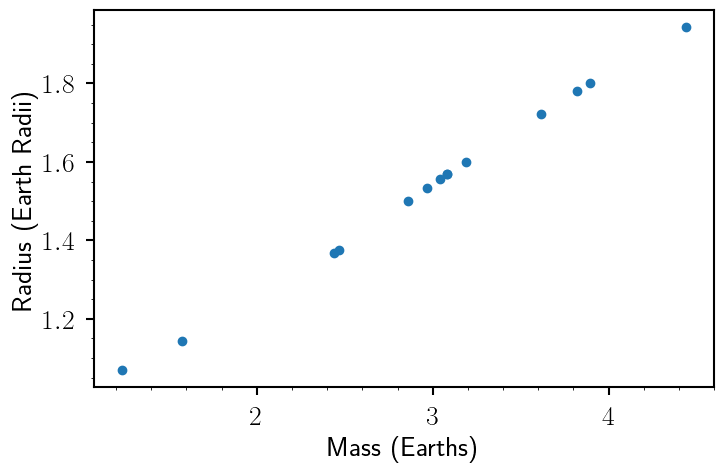

In [18]:
#plt.scatter(l1_masses['masse'].values,l1_masses['rade'].values)
plt.scatter(l1_masses['masse_est'].values,l1_masses['rade'].values)
plt.xlabel('Mass (Earths)')
plt.ylabel('Radius (Earth Radii)')
plt.tick_params(direction='out',width=1.5,length=6,pad=7)
plt.minorticks_on()
#plt.xlim(0,10)
#plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.,fontsize=14)

In [19]:
kepler_ = l1_masses[l1_masses["discoverymethod"].str.contains("Kepler")]
k2_ = l1_masses[l1_masses["discoverymethod"].str.contains("K2")]
tess_ = l1_masses[l1_masses["discoverymethod"].str.contains("TESS")]
other_ = l1_masses[l1_masses["discoverymethod"].str.contains("Mulitple Observatories|MEarth Project|La Silla Observatory|SPECULOOS Southern Observatory")]

In [20]:
print(len(kepler_))
print(len(k2_))
print(len(tess_))

11
1
1


In [21]:
l1_masses

,Unnamed: 0,name,insol,period,rade,radj,discoverymethod,Status,masse_est,masse,hostname
0,0,Kepler-452 b,1.108504,384.843000,1.568324,0.139904,Kepler,Confirmed,3.082162,NaN,Kepler-452
1,1,Kepler-1649 c,0.942183,19.535270,1.069217,0.095381,Kepler,Confirmed,1.235315,NaN,Kepler-1649
2,2,Kepler-1544 b,0.774587,168.811174,1.722270,0.153637,Kepler,Confirmed,3.613241,NaN,Kepler-1544
3,3,Kepler-1410 b,1.060000,60.866168,1.780000,0.158787,Kepler,Confirmed,3.821265,NaN,Kepler-1410
4,4,Kepler-296 f,0.620000,63.336270,1.800000,0.160571,Kepler,Confirmed,3.894446,NaN,Kepler-296
5,5,Kepler-283 c,0.966398,92.743711,1.944526,0.173464,Kepler,Confirmed,4.440091,NaN,Kepler-283
6,6,Kepler-62 f,0.509360,267.291000,1.533375,0.136786,Kepler,Confirmed,2.966459,NaN,Kepler-62
7,7,Kepler-442 b,1.007496,112.305300,1.375733,0.122724,Kepler,Confirmed,2.467450,NaN,Kepler-442
8,8,Kepler-1652 b,0.810000,38.097220,1.600000,0.142730,Kepler,Confirmed,3.188594,NaN,Kepler-1652
9,10,Kepler-441 b,0.241811,207.248200,1.568436,0.139914,Kepler,Confirmed,3.082536,NaN,Kepler-441


In [230]:
tess_['masse'].values

array([nan])

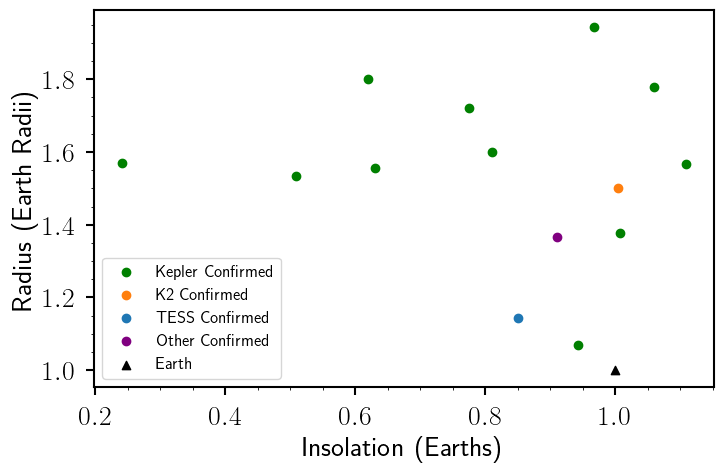

In [22]:
#plt.scatter(comparison['Insolation'].values,comparison['Radius'].values)
#plt.scatter(comparison['Insolation'].values,comparison['rade_est'].values)

plt.scatter(kepler_['insol'].values,kepler_['rade'].values,color = 'green', label = "Kepler Confirmed")
plt.scatter(k2_['insol'].values,k2_['rade'].values,color = 'C1', label = "K2 Confirmed")
plt.scatter(tess_['insol'].values,tess_['rade'].values,color = 'C0', label = "TESS Confirmed")
plt.scatter(other_['insol'].values,other_['rade'].values,color = 'purple', label = "Other Confirmed")
plt.scatter(1,1,color='k',label='Earth',marker="^")



plt.xlabel('Insolation (Earths)')
plt.ylabel('Radius (Earth Radii)')
plt.tick_params(direction='out',width=1.5,length=6,pad=7)
plt.minorticks_on()
plt.legend(loc='lower left', fontsize=12)

#plt.savefig('/Users/lupitatovar/Cool-Worlds/figures/new_targets.pdf',bbox_inches='tight')

Making the mass cuts (less than or equal to 8 Earth Radii)

In [23]:
mass_mask = np.where((l1_masses['masse'].values <= 8) | (l1_masses['masse_est'].values <= 8))[0]
len(mass_mask)

14

In [26]:
print(l1_masses['name'].values[mass_mask][0],l1_masses['insol'].values[mass_mask][0],l1_masses['rade'].values[mass_mask][0])

Kepler-452 b 1.108504328 1.568324324


In [ ]:
print(l1_masses['Planet'].values[mass_mask][1],l1_masses['Insolation'].values[mass_mask][1],l1_masses['Radius'].values[mass_mask][1])



In [27]:
#plt.scatter(comparison['Insolation'].values,comparison['Radius'].values)
#plt.scatter(comparison['Insolation'].values,comparison['rade_est'].values)

plt.scatter(kepler_['insol'].values[mass_mask],kepler_['rade'].values[mass_mask],color = 'green', label = "Kepler Confirmed")
plt.scatter(k2_['insol'].values[mass_mask],k2_['rade'].values[mass_mask],color = 'C1', label = "K2 Confirmed")
plt.scatter(tess_['insol'].values[mass_mask],tess_['rade'].values[mass_mask],color = 'C0', label = "TESS Confirmed")
plt.scatter(other_['insol'].values[mass_mask],other_['rade'].values[mass_mask],color = 'purple', label = "Other Confirmed")
plt.scatter(1,1,color='k',label='Earth',marker="^")



plt.xlabel('Insolation (Earths)')
plt.ylabel('Radius (Earth Radii)')
plt.tick_params(direction='out',width=1.5,length=6,pad=7)
plt.minorticks_on()
plt.legend(loc='lower left', fontsize=12)

#plt.savefig('/Users/lupitatovar/Cool-Worlds/figures/new_targets.pdf',bbox_inches='tight')

IndexError: index 11 is out of bounds for axis 0 with size 11

### Adding in the Candidates

In [17]:
candidates = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/candidates.csv',skiprows=1,
                 names=['name','Insolation','Period','Radius','Jup_Radius','Discovery','Status'])
#candidates

In [29]:
print(len(candidates))

47


In [30]:
kepler_c = candidates[candidates["Discovery"].str.contains("Kepler")]
k2_c = candidates[candidates["Discovery"].str.contains("K2")]
tess_c = candidates[candidates["Discovery"].str.contains("TESS")]

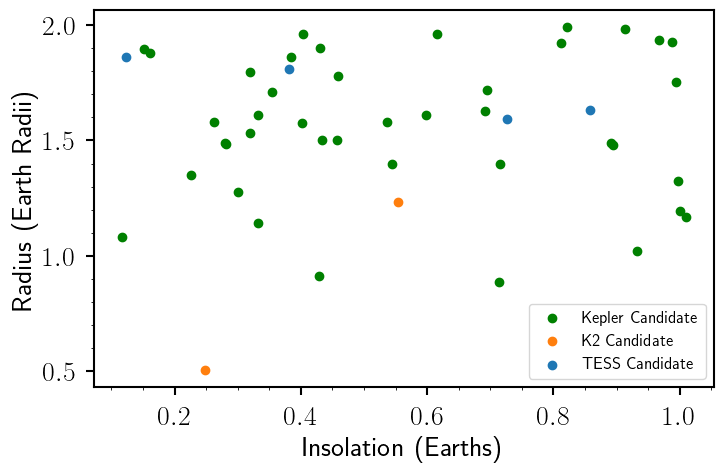

In [31]:
#plt.scatter(candidates['Insolation'].values,candidates['Radius'].values)
plt.scatter(kepler_c['Insolation'].values,kepler_c['Radius'].values,color = 'green', label = "Kepler Candidate")
plt.scatter(k2_c['Insolation'].values,k2_c['Radius'].values,color = 'C1', label = "K2 Candidate")
plt.scatter(tess_c['Insolation'].values,tess_c['Radius'].values,color = 'C0', label = "TESS Candidate")
#plt.scatter(other['Insolation'].values,other['Radius'].values,color = 'purple', label = "Other Confirmed")
#plt.scatter(1,1,color='k',label='Earth',marker="^")


plt.xlabel('Insolation (Earths)')
plt.ylabel('Radius (Earth Radii)')
plt.tick_params(direction='out',width=1.5,length=6,pad=7)
plt.minorticks_on()
plt.legend(fontsize=12)

#plt.savefig('/Users/lupitatovar/Cool-Worlds/figures/candidates_inso_radii.pdf',bbox_inches='tight')

In [56]:
candidates['eccen']=candidates['name'].map(full_table.set_index('name')['eccen'])
#candidates

In [18]:
#candidates['st_log_lum']=candidates['name'].map(full_table.set_index('name')['st_log_lum'])
#candidates['semi_au']=candidates['name'].map(full_table.set_index('name')['semi_au'])

In [21]:
#candidates['masse_est']=candidates['name'].map(full_table.set_index('name')['masse_est'])
#candidates['masse']=candidates['name'].map(full_table.set_index('name')['masse'])
#candidates['hostname']=candidates['name'].map(full_table.set_index('name')['hostname'])



#candidate_masses
#candidates.to_csv('/Users/lupitatovar/Cool-Worlds/targets/candidate_masses.csv')
#candidate_masses = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/candidate_masses.csv')

In [22]:
candidate_masses

,Unnamed: 0,name,Insolation,Period,Radius,Jup_Radius,Discovery,Status,st_log_lum,semi_au,masse_est,masse,hostname
0,0,KOI-4427.01,0.318849,147.661729,1.797673,0.160363,Kepler,Candidate,-1.195000,0.447412,3.885904,NaN,KIC 4172805
1,1,KOI-4848.01,0.160519,384.6961,1.880000,0.167707,Kepler,Candidate,-0.883000,0.903101,4.192848,NaN,KIC 9005321
2,2,KOI-7716.01,0.434274,483.36405,1.503482,0.134120,Kepler,Candidate,-0.238000,1.153766,2.868943,NaN,KIC 5097856
3,3,KOI-4878.01,0.933017,449.01499,1.020524,0.091037,Kepler,Candidate,0.083000,1.139083,1.045258,NaN,KIC 11804437
4,4,KOI-5087.01,0.332875,651.07431,1.141911,0.101865,Kepler,Candidate,-0.160000,1.441648,1.563745,NaN,KIC 4770798
5,5,KOI-5227.01,0.598983,371.56492,1.611944,0.143795,Kepler,Candidate,-0.251000,0.967816,3.229114,NaN,KIC 6034834
6,6,KOI-5236.01,0.811569,550.86514,1.921435,0.171404,Kepler,Candidate,0.160000,1.334558,4.350944,NaN,KIC 6067545
7,7,KOI-5130.01,0.430720,370.05918,1.900000,0.169492,Kepler,Candidate,-0.420683,0.938774,4.268858,NaN,KIC 5166811
8,8,KOI-5408.01,0.354582,415.748785,1.710821,0.152616,Kepler,Candidate,-0.421000,1.034289,3.572556,NaN,KIC 7631138
9,9,KOI-5789.01,0.319386,383.26217,1.532865,0.136741,Kepler,Candidate,-0.545000,0.944805,2.964783,NaN,KIC 10387792


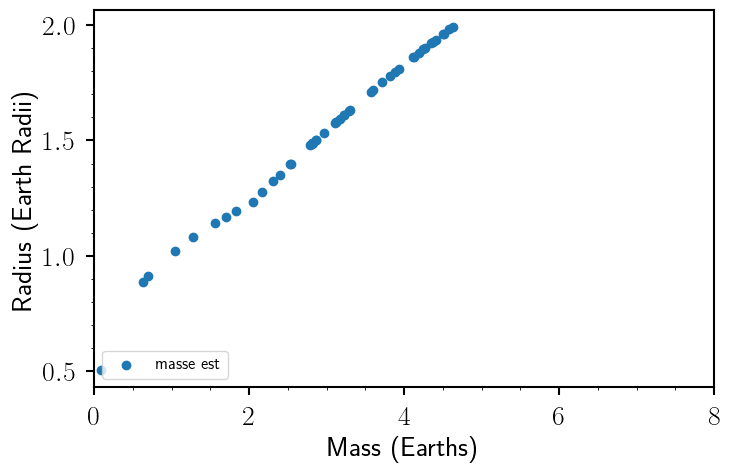

In [34]:
#plt.scatter(candidate_masses['masse'].values,candidate_masses['Radius'].values,label='masse')
plt.scatter(candidate_masses['masse_est'].values,candidate_masses['Radius'].values,label='masse est')
plt.xlabel('Mass (Earths)')
plt.ylabel('Radius (Earth Radii)')
plt.tick_params(direction='out',width=1.5,length=6,pad=7)
plt.minorticks_on()
plt.xlim(0,8)
plt.legend(loc='lower left', fontsize=12)

#plt.savefig('/Users/lupitatovar/Cool-Worlds/figures/candidates_inso_radii.pdf',bbox_inches='tight')

In [35]:
# how many values less than mass 8?
print(np.count_nonzero(candidate_masses['masse'].values <= 8))
print(np.count_nonzero(candidate_masses['masse_est'].values <= 8))

0
47


In [36]:
kepler_c = candidate_masses[candidate_masses["Discovery"].str.contains("Kepler")]
k2_c = candidate_masses[candidate_masses["Discovery"].str.contains("K2")]
tess_c = candidate_masses[candidate_masses["Discovery"].str.contains("TESS")]

In [37]:
# Making a mass cut to match Lynnae's cuts of less than or equal to 8 earth masses
mass_c_mask = np.where(((candidate_masses['masse_est'].values <= 8)))[0]
print(len(mass_c_mask))

47


In [38]:
print(len(np.where(candidate_masses["Discovery"].str.contains("Kepler"))[0]))
print(len(np.where(candidate_masses["Discovery"].str.contains("K2"))[0]))
print(len(np.where(candidate_masses["Discovery"].str.contains("TESS"))[0]))

41
2
4


In [39]:
kepler_c_m = (np.where(candidate_masses["Discovery"][mass_c_mask].str.contains("Kepler"))[0])
k2_c_m = (np.where(candidate_masses["Discovery"][mass_c_mask].str.contains("K2"))[0])
tess_c_m = (np.where(candidate_masses["Discovery"][mass_c_mask].str.contains("TESS"))[0])

In [40]:
candidate_masses.head()

,Unnamed: 0,name,Insolation,Period,Radius,Jup_Radius,Discovery,Status,masse_est,masse,hostname
0,0,KOI-4427.01,0.318849,147.661729,1.797673,0.160363,Kepler,Candidate,3.885904,NaN,KIC 4172805
1,1,KOI-4848.01,0.160519,384.6961,1.880000,0.167707,Kepler,Candidate,4.192848,NaN,KIC 9005321
2,2,KOI-7716.01,0.434274,483.36405,1.503482,0.134120,Kepler,Candidate,2.868943,NaN,KIC 5097856
3,3,KOI-4878.01,0.933017,449.01499,1.020524,0.091037,Kepler,Candidate,1.045258,NaN,KIC 11804437
4,4,KOI-5087.01,0.332875,651.07431,1.141911,0.101865,Kepler,Candidate,1.563745,NaN,KIC 4770798


In [42]:
print(candidate_masses['name'].values[45], candidate_masses['masse'].values[45])

TOI-2433.01 nan


In [ ]:
candidates['Planet'].values[mass_c_mask]

In [ ]:
candidates.values[mass_c_mask][17]

In [43]:
print('KOIs:', candidates['name'].values[kepler_c_m])

KOIs: ['KOI-4427.01' 'KOI-4848.01' 'KOI-7716.01' 'KOI-4878.01' 'KOI-5087.01'
 'KOI-5227.01' 'KOI-5236.01' 'KOI-5130.01' 'KOI-5408.01' 'KOI-5789.01'
 'KOI-5798.01' 'KOI-5556.01' 'KOI-5810.01' 'KOI-5457.01' 'KOI-5715.01'
 'KOI-5609.01' 'KOI-5616.01' 'KOI-5755.01' 'KOI-5506.01' 'KOI-5387.01'
 'KOI-5389.01' 'KOI-5643.01' 'KOI-5938.01' 'KOI-5948.01' 'KOI-5949.01'
 'KOI-5971.01' 'KOI-5978.01' 'KOI-5870.01' 'KOI-5893.01' 'KOI-3456.02'
 'KOI-2281.02' 'KOI-3401.02' 'KOI-7470.01' 'KOI-6343.01' 'KOI-7591.01'
 'KOI-8107.01' 'KOI-8242.01' 'KOI-7923.01' 'KOI-8253.01' 'KOI-8047.01'
 'KOI-7953.01']


In [44]:
print('K2 Candidates:', candidates['name'].values[k2_c_m])
print('TOIs:', candidates['name'].values[tess_c_m])

K2 Candidates: ['EPIC 246711015.01' 'EPIC 246711015.02']
TOIs: ['TOI-715.01' 'TOI-2263.01' 'TOI-2433.01' 'TOI-4328.01']


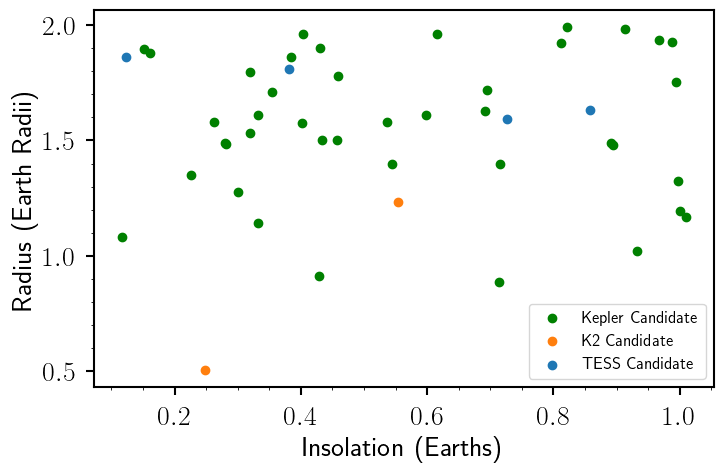

In [45]:
#plt.scatter(candidates['Insolation'].values[mass_c_mask],candidates['Radius'].values[mass_c_mask])

plt.scatter(candidates['Insolation'].values[kepler_c_m],candidates['Radius'].values[kepler_c_m],color = 'green', label = "Kepler Candidate")
plt.scatter(candidates['Insolation'].values[k2_c_m],candidates['Radius'].values[k2_c_m],color = 'C1', label = "K2 Candidate")
plt.scatter(candidates['Insolation'].values[tess_c_m],candidates['Radius'].values[tess_c_m],color = 'C0', label = "TESS Candidate")



plt.xlabel('Insolation (Earths)')
plt.ylabel('Radius (Earth Radii)')
plt.tick_params(direction='out',width=1.5,length=6,pad=7)
plt.minorticks_on()
plt.legend(fontsize=12)

#plt.savefig('/Users/lupitatovar/Cool-Worlds/figures/candidates_m_r_i.pdf',bbox_inches='tight')

In [47]:
print('TOIs:', candidates['name'].values[tess_c_m])
#print('TOIs masses:', candidates['masse_est'].values[tess_c_m])
print('TOIs radii:', candidates['Radius'].values[tess_c_m])
print('TOIs Insol:', candidates['Insolation'].values[tess_c_m])

TOIs: ['TOI-715.01' 'TOI-2263.01' 'TOI-2433.01' 'TOI-4328.01']
TOIs radii: [1.59466426 1.63308874 1.81031013 1.8602949 ]
TOIs Insol: [0.72610327 0.85741177 0.38198029 0.12251088]


In [306]:
candidate_masses['name'].values

array(['KOI-4427.01', 'KOI-4848.01', 'KOI-7716.01', 'KOI-4878.01',
       'KOI-5087.01', 'KOI-5227.01', 'KOI-5236.01', 'KOI-5130.01',
       'KOI-5408.01', 'KOI-5789.01', 'KOI-5798.01', 'KOI-5556.01',
       'KOI-5810.01', 'KOI-5457.01', 'KOI-5715.01', 'KOI-5609.01',
       'KOI-5616.01', 'KOI-5755.01', 'KOI-5506.01', 'KOI-5387.01',
       'KOI-5389.01', 'KOI-5643.01', 'KOI-5938.01', 'KOI-5948.01',
       'KOI-5949.01', 'KOI-5971.01', 'KOI-5978.01', 'KOI-5870.01',
       'KOI-5893.01', 'KOI-3456.02', 'KOI-2281.02', 'KOI-3401.02',
       'KOI-7470.01', 'KOI-6343.01', 'KOI-7591.01', 'KOI-8107.01',
       'KOI-8242.01', 'KOI-7923.01', 'KOI-8253.01', 'KOI-8047.01',
       'KOI-7953.01', 'EPIC 246711015.01', 'EPIC 246711015.02',
       'TOI-715.01', 'TOI-2263.01', 'TOI-2433.01', 'TOI-4328.01'],
      dtype=object)

In [23]:
#candidates_mri = candidate_masses[(candidate_masses['masse'].values <= 8) | (candidate_masses['masse_est'].values <= 8)]

In [278]:
#candidates_mri

In [24]:
#candidates_mri.to_csv('/Users/lupitatovar/Cool-Worlds/targets/candidates_mri_list.csv')
#candidates_mri= pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/candidates_mri_list.csv')

In [ ]:
#candidates_mri